In [50]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

# Load OMXH25 Data
Convert ticker symbols to company names and reverse timeseries to begin from the oldest date.

In [208]:
df_25 = pd.read_csv('omxh25_closing_prices.csv', index_col='Date')
df_25.index = pd.to_datetime(df_25.index)
df_25_keys = pd.read_csv('omxh25_keys.csv')

col_name = []
for col in df_25.columns:
    col_name.append(df_25_keys.loc[df_25_keys['ticker'] == col, 'name'].values[0])

df_25 = pd.DataFrame(df_25.iloc[:,:].values, index=df_25.index, columns=col_name)

# Data must start from the beginning of the history!
df_25 = df_25[::-1]


df_25 = df_25.drop(columns=['Qt Group', 'Kojamo'])

SPLIT_DATE = '2020-12-28'
END_DATE = '2022-12-01'
df_25 = df_25.loc[:END_DATE]
df_25_study = df_25.loc[:SPLIT_DATE]
df_25_test = df_25.loc[SPLIT_DATE:]

display(df_25_study)
print(df_25_study.info())

display(df_25_test)
print(df_25_test.info())

,Kesko,Huhtamäki,Elisa,Stora Enso,Wärtsilä,Valmet,Nordea Bank,Orion Corporation,Nokia,Metsä Board,...,Neste,Kone,UPM,Telia Company,Sampo,Metso Outotec,SSAB B,Cargotec,TietoEVRY,Fortum
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,3.175,8.880,39.40,18.000,2.222,NaN,NaN,NaN,47.450,9.433,...,NaN,NaN,21.10,NaN,7.80,NaN,NaN,NaN,65.75,4.610
2000-01-04,3.120,8.575,37.00,17.200,2.222,NaN,NaN,NaN,43.363,8.763,...,NaN,NaN,21.55,NaN,7.34,NaN,NaN,NaN,60.00,4.670
2000-01-05,3.113,8.438,32.00,16.700,2.111,NaN,NaN,NaN,39.503,8.656,...,NaN,NaN,21.10,NaN,7.04,NaN,NaN,NaN,53.00,4.550
2000-01-07,3.025,8.538,32.10,17.800,2.133,NaN,NaN,NaN,41.625,8.534,...,NaN,NaN,20.75,NaN,7.20,NaN,NaN,NaN,56.00,4.680
2000-01-10,3.088,8.750,35.25,17.800,2.222,NaN,NaN,NaN,42.663,8.534,...,NaN,NaN,21.35,NaN,7.40,NaN,NaN,NaN,57.40,4.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,20.720,42.000,45.50,15.680,8.050,22.72,6.765,37.89,3.247,8.725,...,57.90,66.96,30.20,3.420,34.40,7.700,2.630,33.64,26.32,19.245
2020-12-21,20.300,41.280,44.21,15.110,7.828,21.86,6.544,37.19,3.133,8.500,...,57.64,66.54,29.58,3.313,33.38,7.520,2.574,33.20,25.88,18.575
2020-12-22,20.360,42.060,44.35,15.195,8.012,22.54,6.551,37.32,3.157,8.540,...,57.82,66.60,29.72,3.329,33.63,7.675,2.584,33.34,26.34,19.010


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5273 entries, 2000-01-03 to 2020-12-28
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kesko              5273 non-null   float64
 1   Huhtamäki          5273 non-null   float64
 2   Elisa              5273 non-null   float64
 3   Stora Enso         5273 non-null   float64
 4   Wärtsilä           5273 non-null   float64
 5   Valmet             1755 non-null   float64
 6   Nordea Bank        5254 non-null   float64
 7   Orion Corporation  3644 non-null   float64
 8   Nokia              5273 non-null   float64
 9   Metsä Board        5273 non-null   float64
 10  Outokumpu          5272 non-null   float64
 11  Nokian Tyres       5261 non-null   float64
 12  Konecranes         5270 non-null   float64
 13  Neste              3949 non-null   float64
 14  Kone               3918 non-null   float64
 15  UPM                5273 non-null   float64
 16  Telia 

,Kesko,Huhtamäki,Elisa,Stora Enso,Wärtsilä,Valmet,Nordea Bank,Orion Corporation,Nokia,Metsä Board,...,Neste,Kone,UPM,Telia Company,Sampo,Metso Outotec,SSAB B,Cargotec,TietoEVRY,Fortum
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,20.78,42.52,44.51,15.680,8.236,22.97,6.712,37.14,3.173,8.485,...,58.94,67.30,30.33,3.365,34.65,7.885,2.584,34.24,26.52,19.675
2020-12-29,21.34,42.92,45.20,15.745,8.242,23.29,6.728,37.56,3.206,8.615,...,59.56,67.38,30.53,3.400,34.79,8.195,2.599,33.82,26.96,19.835
2020-12-30,21.04,42.26,44.87,15.645,8.150,23.36,6.672,37.53,3.151,8.620,...,59.16,66.46,30.47,3.380,34.57,8.175,2.608,33.82,26.86,19.700
2021-01-04,21.66,42.00,45.53,15.665,8.074,23.68,6.632,37.92,3.165,8.690,...,59.30,67.64,30.43,3.403,34.23,8.360,2.649,33.80,26.92,20.210
2021-01-05,21.36,41.08,45.47,15.525,8.232,23.12,6.600,37.46,3.206,8.490,...,61.58,66.24,29.87,3.389,33.93,8.150,2.641,34.22,27.00,20.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,21.04,36.56,50.60,14.050,8.292,24.92,10.094,48.98,4.686,8.305,...,47.77,47.63,34.69,2.715,48.07,8.972,5.252,39.32,26.14,14.835
2022-11-28,20.60,36.37,50.14,13.750,8.038,24.52,9.979,49.79,4.582,8.220,...,46.91,46.99,34.16,2.679,47.62,8.856,5.216,39.20,25.86,14.985
2022-11-29,20.53,36.05,49.56,14.040,8.170,24.62,10.048,50.42,4.571,8.435,...,46.69,48.50,34.66,2.641,48.33,8.814,5.360,39.62,26.32,15.020


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2020-12-28 to 2022-12-01
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kesko              489 non-null    float64
 1   Huhtamäki          489 non-null    float64
 2   Elisa              489 non-null    float64
 3   Stora Enso         489 non-null    float64
 4   Wärtsilä           489 non-null    float64
 5   Valmet             489 non-null    float64
 6   Nordea Bank        489 non-null    float64
 7   Orion Corporation  489 non-null    float64
 8   Nokia              489 non-null    float64
 9   Metsä Board        489 non-null    float64
 10  Outokumpu          489 non-null    float64
 11  Nokian Tyres       489 non-null    float64
 12  Konecranes         489 non-null    float64
 13  Neste              489 non-null    float64
 14  Kone               489 non-null    float64
 15  UPM                489 non-null    float64
 16  Telia C

# Plots some informative figures

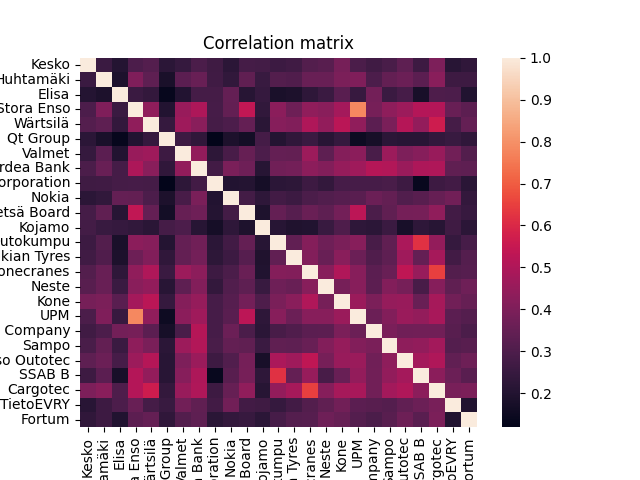

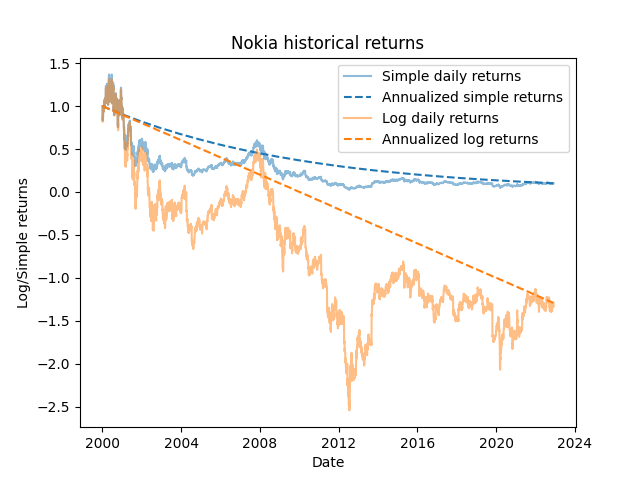

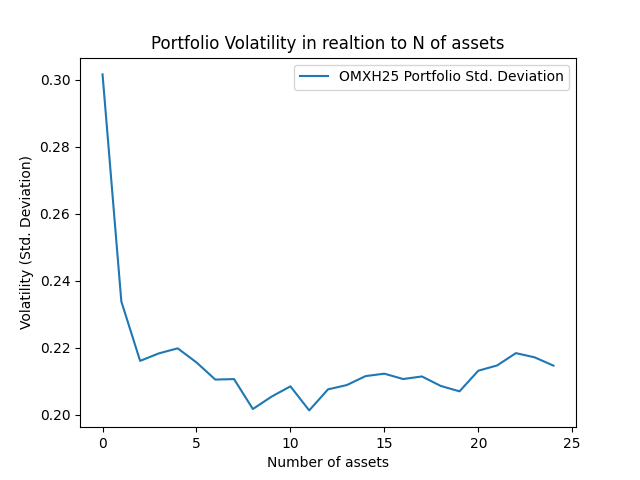

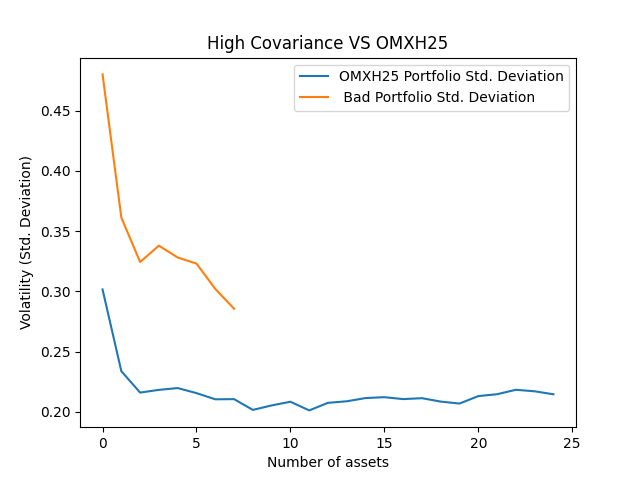

In [199]:
returns_daily = df_25.pct_change(periods=1)+1
returns_daily.iloc[0,:] = 1 # Fixes the first row from Nan to 1
log_returns = np.log(returns_daily)
log_returns_annual = log_returns.mean() * 252 #log returns are addative

cov_daily = log_returns.cov()
cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive

# Correlation matrix
plt.figure('Correlation')
plt.clf()
sns.heatmap(log_returns.corr())
plt.title('Correlation matrix')
plt.show()

# Log vs simple returns
STOCK = 'Nokia'
plt.figure(STOCK)
plt.clf()

plt.plot(returns_daily[STOCK].cumprod(), color='C0', alpha=0.5, label='Simple daily returns')
avg_simple_day_change =  np.power(np.power(returns_daily[STOCK].cumprod().iloc[-1]/1, 1/len(returns_daily.index)), range(len(returns_daily.index)))
plt.plot(returns_daily.index, avg_simple_day_change, color='C0', linestyle='--', label='Annualized simple returns')

plt.plot(log_returns[STOCK].cumsum() +1, color='C1', alpha=0.5, label='Log daily returns')
avg_log_day_change = range(len(log_returns.index)) * log_returns[STOCK].mean() +1
plt.plot(log_returns.index, avg_log_day_change, color='C1', linestyle='--', label='Annualized log returns')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Log/Simple returns') 
plt.title(f'{STOCK} historical returns')
plt.show()

# Portfolio Volatility in realtion to N of assets
num_assets = len(df_25.columns)
assets = np.zeros(num_assets)
n_vola = []
for i in range(num_assets):
    assets[i] = 1
    weights = np.divide(assets, np.sum(assets))
    port_vola = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    n_vola.append(port_vola)

plt.figure('Portfolio Standard Deviation')
plt.clf()
plt.plot(n_vola, label='OMXH25 Portfolio Std. Deviation')
plt.legend()
plt.xlabel('Number of assets')
plt.ylabel('Volatility (Std. Deviation)') 
plt.title('Portfolio Volatility in realtion to N of assets')
plt.show()

# Bad Portfolio Volatility 
num_assets = len(df_25.columns)
assets = np.zeros(num_assets)
n2_vola = []
for i in [12, 13, 14, 20, 21, 22, 5, 23]:
    assets[i] = 1
    weights = np.divide(assets, np.sum(assets))
    port_vola = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    n2_vola.append(port_vola)

plt.figure('Bad Portfolio Standard Deviation')
plt.clf()
plt.plot(n_vola, label='OMXH25 Portfolio Std. Deviation')
plt.plot(n2_vola, label=' Bad Portfolio Std. Deviation')
plt.legend()
plt.xlabel('Number of assets')
plt.ylabel('Volatility (Std. Deviation)') 
plt.title('High Covariance VS OMXH25')
plt.show()

In [200]:
def mc_efficient_frontier(df, num_iterations=500000, min_assets=1):

    returns_daily = df.pct_change(periods=1)+1
    returns_daily.iloc[0,:] = 1 # Fixes the first row from Nan to 1
    log_returns = np.log(returns_daily)
    log_returns_annual = log_returns.mean() * 252 #log returns are addative

    cov_daily = log_returns.cov()
    cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive

    port_returns = []
    port_volatility = []
    port_sharpe = []
    port_weights = []
    asset_returns = []
    asset_volatility = []
    num_assets = len(df.columns)

    for i in range(num_iterations):

        # Compute random sized portfolio with random assets
        random_portfolio_size = np.random.randint(min_assets, num_assets+1)
        random_assets = np.random.choice(num_assets, size=random_portfolio_size, replace=False)
        # Copmute random normalized weights for each asset
        weights = np.zeros(num_assets)
        weights[random_assets] = np.random.random(random_portfolio_size)
        weights = np.divide(weights, np.sum(weights))
        port_weights.append(weights)

        # Copmutes historical log return of portfolio
        returns = np.dot(weights, log_returns_annual)
        port_returns.append(returns)

        # Copmutes historical volatility of portfolio
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        port_volatility.append(volatility)
        port_sharpe.append(returns / volatility)


    # Get actual asset values
    for i in range(num_assets):
        weights = np.zeros(num_assets)
        weights[i] = 1
        returns = np.dot(weights, log_returns_annual) 
        asset_returns.append(returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        asset_volatility.append(volatility)

    # Final dictionary
    portfolios = {'Returns': port_returns,
                'Volatility': port_volatility,
                'Weights': port_weights,
                'Sharpe': port_sharpe,
                'OptimalReturn': port_returns[np.argmax(port_sharpe)],
                'OptimalVolatility': port_volatility[np.argmax(port_sharpe)],
                'OptimalWeights': port_weights[np.argmax(port_sharpe)],
                'VarianceReturn': port_returns[np.argmin(port_volatility)],
                'VarianceVolatility': port_volatility[np.argmin(port_volatility)],
                'VarianceWeights': port_weights[np.argmin(port_volatility)],
                'Assets': df.columns.tolist(),
                'AssetReturns': asset_returns,
                'AssetVolatility': asset_volatility}

    return portfolios

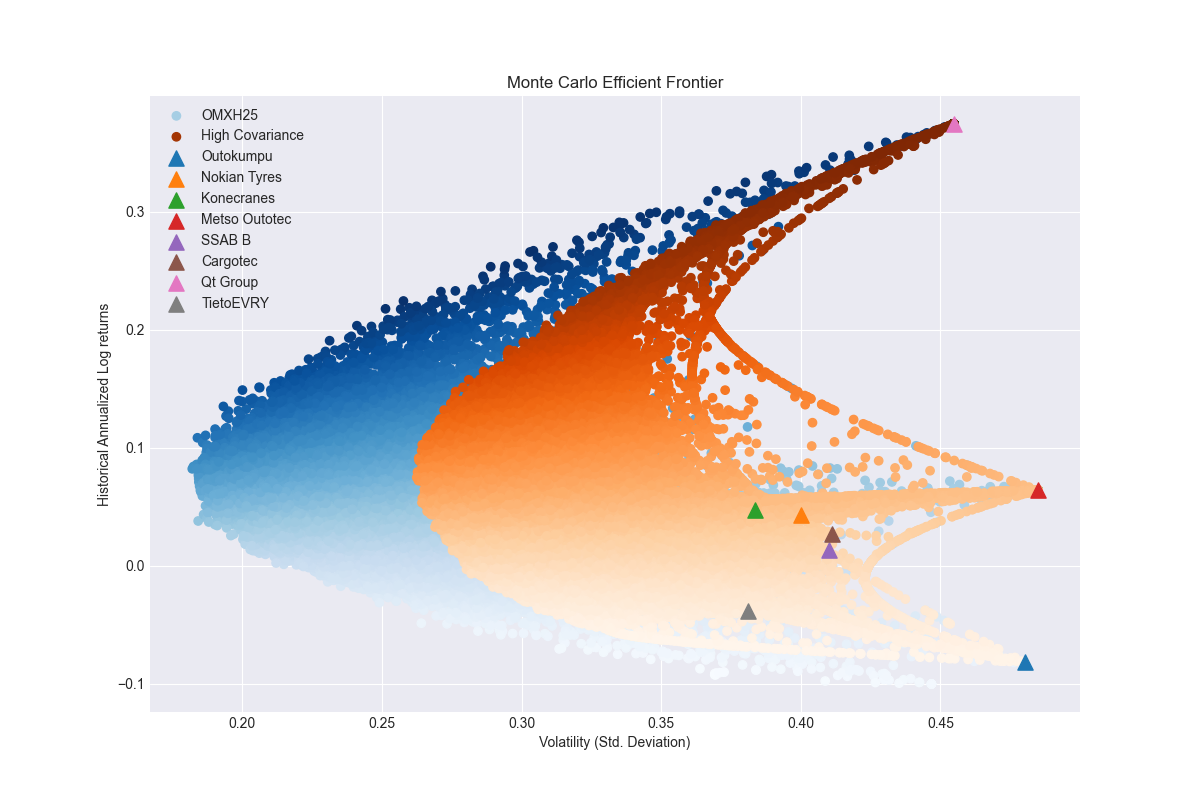

In [201]:
plt.figure('Efficient Frontier Compare' ,figsize=(12, 8))
plt.style.use('seaborn-v0_8-darkgrid')
plt.cla()

portfolios = mc_efficient_frontier(df_25, 150000)
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='Blues', label='OMXH25')

portfolios = mc_efficient_frontier(df_25.iloc[:,[12, 13, 14, 20, 21, 22, 5, 23]], 60000)
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='Oranges', label='High Covariance')

plt.rcParams["image.cmap"] = 'hsv'
colors  = plt.cm.get_cmap('hsv', len(portfolios['Assets']))
for i in range(len(portfolios['Assets'])):
    plt.scatter(portfolios['AssetVolatility'][i], portfolios['AssetReturns'][i], marker='^', s=120, label=portfolios['Assets'][i])

plt.legend()
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Historical Annualized Log returns') 
plt.title('Monte Carlo Efficient Frontier')
plt.show()

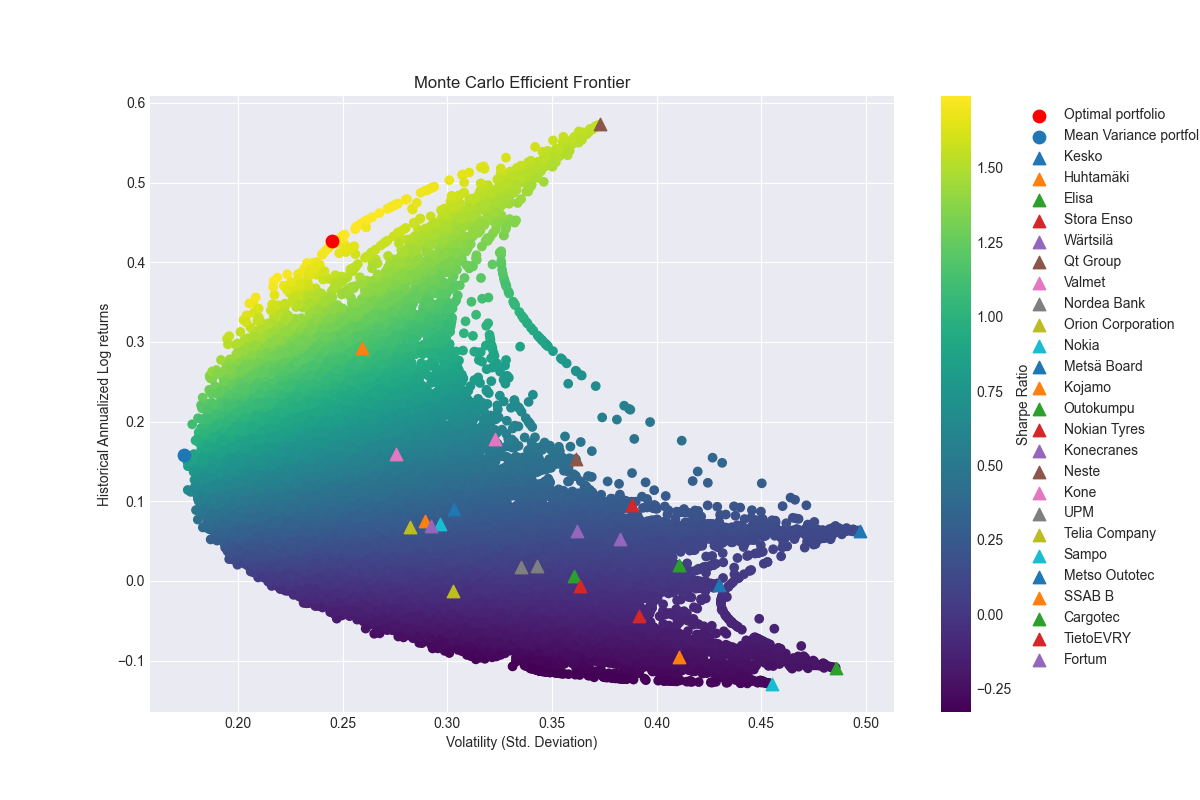

Maximum Sharpe: 1.7413532896323134
Obtained with weights:
Asset: Qt Group        Weight: 0.49
Asset: Kojamo          Weight: 0.47
Asset: Kone            Weight: 0.03


In [202]:
plt.figure('Efficient Frontier' ,figsize=(12, 22))
plt.clf()
plt.style.use('seaborn-v0_8-darkgrid')

portfolios = mc_efficient_frontier(df_25_study, min_assets=2)
sc = plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe'], cmap='viridis')
plt.colorbar(sc).set_label('Sharpe Ratio')

plt.scatter(portfolios['OptimalVolatility'], portfolios['OptimalReturn'], c='red', s=80, label='Optimal portfolio')
plt.scatter(portfolios['VarianceVolatility'], portfolios['VarianceReturn'], c='C0', s=80, label='Mean Variance portfolio')

for i in range(len(portfolios['Assets'])):
    plt.scatter(portfolios['AssetVolatility'][i], portfolios['AssetReturns'][i], marker='^', s=80, label=portfolios['Assets'][i])

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1), fancybox=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Historical Annualized Log returns') 
plt.title('Monte Carlo Efficient Frontier')
plt.show()

print('Maximum Sharpe: ' + str(max(portfolios['Sharpe'])))
print('Obtained with weights:')
for i in range(len(portfolios['OptimalWeights'])):
    if portfolios['OptimalWeights'][i] != 0:
        print('Asset: {a:15s} Weight: {w:.2f}'.format(a=portfolios['Assets'][i], w=portfolios['OptimalWeights'][i]))



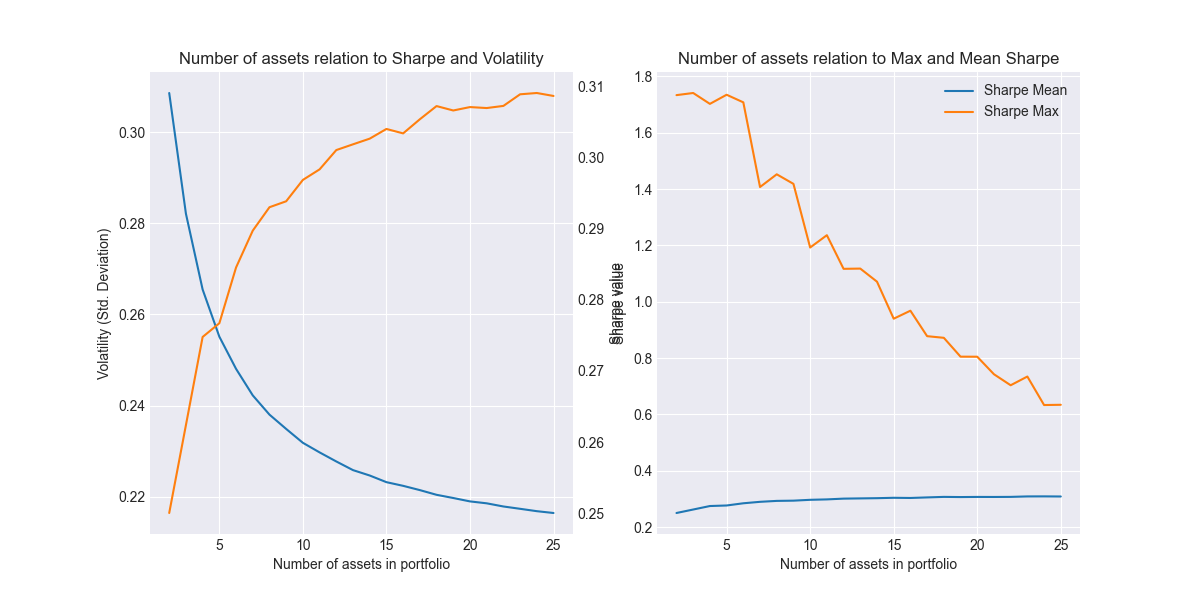

In [203]:
n_assets = np.count_nonzero(portfolios['Weights'], axis=1)

df = pd.DataFrame(n_assets , columns=['Assets'])
df['Vola'] = portfolios['Volatility']
df['Sharpe'] = portfolios['Sharpe']
df = df.set_index('Assets')

df = df.groupby('Assets').agg(Sharpe=('Sharpe', 'mean'), 
                            SharpeMax=('Sharpe', 'max'), 
                            Vola=('Vola', 'mean'))

fig = plt.figure('Asset number std sharpe')
fig.set_figheight(6)
fig.set_figwidth(12)
plt.clf()
plt.subplot(1, 2, 1)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.Vola, color='C0', label='Volatility')
ax2.plot(df.Sharpe, color='C1', label='Sharpe')

ax1.set_xlabel('Number of assets in portfolio')
ax1.set_ylabel('Volatility (Std. Deviation)')
ax2.set_ylabel('Sharpe value')
ax2.grid(None)
plt.title('Number of assets relation to Sharpe and Volatility')


plt.subplot(1, 2, 2)

plt.plot(df.Sharpe, color='C0', label='Sharpe Mean')
plt.plot(df.SharpeMax, color='C1', label='Sharpe Max')

plt.legend()
plt.xlabel('Number of assets in portfolio')
plt.ylabel('Sharpe value')
plt.title('Number of assets relation to Max and Mean Sharpe')
plt.show()


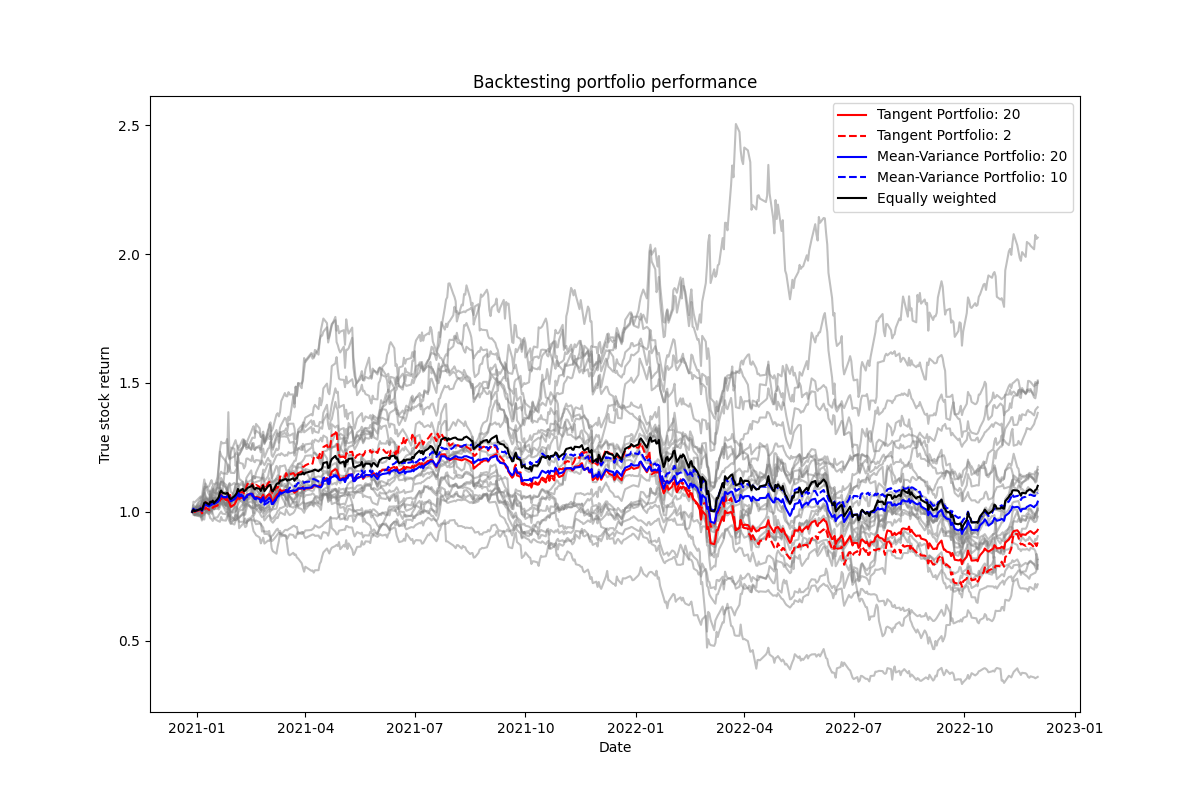

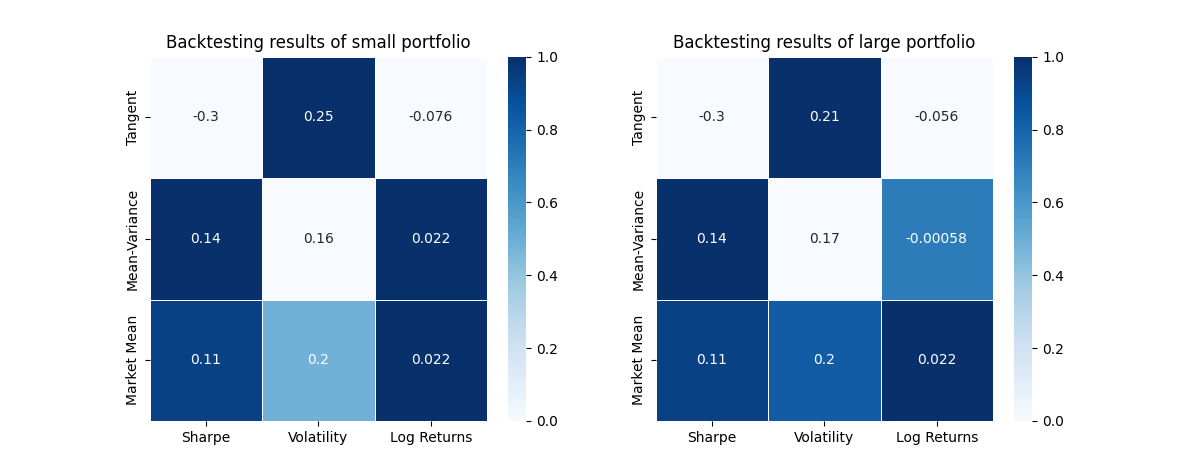

In [210]:
small_port = mc_efficient_frontier(df_25_study, num_iterations=100000, min_assets=2)
large_port = mc_efficient_frontier(df_25_study, num_iterations=100000, min_assets=20)
returns_daily = df_25_test.pct_change(periods=1)+1
returns_daily.iloc[0,:] = 1 # Fixes the first row from Nan to 1
cumulative_returns = returns_daily.cumprod()

'''
Plotting
'''
plt.figure('Backtesting' ,figsize=(12, 8))
plt.cla()
plt.style.use('default')

# Stocks
plt.plot(returns_daily.cumprod(), color='grey', alpha=0.5)

# Large Optimal portfolio
weighted_returns = cumulative_returns.multiply(large_port['OptimalWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='red', label=f'Tangent Portfolio: ' + str(np.count_nonzero(large_port['OptimalWeights'])))

# Small Optimal portfolio
weighted_returns = cumulative_returns.multiply(small_port['OptimalWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='red', linestyle='--', label=f'Tangent Portfolio: ' + str(np.count_nonzero(small_port['OptimalWeights'])))

# Large Mean-Variance Portfolio
weighted_returns = cumulative_returns.multiply(large_port['VarianceWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='blue', label=f'Mean-Variance Portfolio: ' + str(np.count_nonzero(large_port['VarianceWeights'])))

# Small Mean-Variance Portfolio
weighted_returns = cumulative_returns.multiply(small_port['VarianceWeights'] ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='blue', linestyle='--', label=f'Mean-Variance Portfolio: ' + str(np.count_nonzero(small_port['VarianceWeights'])))

# Equal Weight Portfolio
weights = np.ones(len(df_25_study.columns)) 
weights = weights / np.sum(weights)
weighted_returns = cumulative_returns.multiply(weights ,axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
plt.plot(portfolio_returns, color='black', label='Equally weighted')

plt.legend()
plt.xlabel('Date')
plt.ylabel('True stock return')
plt.title(f'Backtesting portfolio performance')
plt.show()


'''
Results
'''
plt.figure('Results')
plt.clf()
fig.set_figheight(4)
fig.set_figwidth(12)

# Mean results
log_returns = np.log(returns_daily)
log_returns_annual = log_returns.mean() * 252 #log returns are addative
cov_daily = log_returns.cov()
cov_annual = cov_daily * 252 # assuming dates are uncorrelated, variance is additive
weights = [1]*len(df_25_study.columns)
weights = weights / np.sum(weights)
mean_returns = np.dot(weights, log_returns_annual)
mean_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
mean_sharpe = mean_returns / mean_volatility

# Small Optimal portfolio
weights = small_port['OptimalWeights'] 
weights = weights / np.sum(weights)
optimal_returns = np.dot(weights, log_returns_annual)
optimal_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
optimal_sharpe = optimal_returns / optimal_volatility

# Small Variance results
weights = small_port['VarianceWeights'] 
weights = weights / np.sum(weights)
variance_returns = np.dot(weights, log_returns_annual)
variance_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
variance_sharpe = variance_returns / variance_volatility

# Large Optimal portfolio
weights = large_port['OptimalWeights'] 
weights = weights / np.sum(weights)
large_optimal_returns = np.dot(weights, log_returns_annual)
large_optimal_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
large_optimal_sharpe = optimal_returns / optimal_volatility

# Large Variance results
weights = large_port['VarianceWeights'] 
weights = weights / np.sum(weights)
large_variance_returns = np.dot(weights, log_returns_annual)
large_variance_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
large_variance_sharpe = variance_returns / variance_volatility

plt.subplot(1, 2, 1)
stats = ['Sharpe', 'Volatility', 'Log Returns']
groups = ['Tangent', 'Mean-Variance', 'Market Mean']
values = np.array([[optimal_sharpe, optimal_volatility, optimal_returns],
                    [variance_sharpe, variance_volatility, variance_returns],
                    [mean_sharpe, mean_volatility, mean_returns]])

df = pd.DataFrame(data=values, index=groups, columns=stats)
scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.heatmap(scaled_df, annot=df, linewidths=0.5, cmap='Blues')
plt.title(f'Backtesting results of small portfolio')

plt.subplot(1, 2, 2)
stats = ['Sharpe', 'Volatility', 'Log Returns']
groups = ['Tangent', 'Mean-Variance', 'Market Mean']
values = np.array([[large_optimal_sharpe, large_optimal_volatility, large_optimal_returns],
                    [large_variance_sharpe, large_variance_volatility, large_variance_returns],
                    [mean_sharpe, mean_volatility, mean_returns]])

df = pd.DataFrame(data=values, index=groups, columns=stats)
scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.heatmap(scaled_df, annot=df, linewidths=0.5, cmap='Blues')
plt.title(f'Backtesting results of large portfolio')

plt.show()